In [1]:
import xarray as xr
import numpy as np
import clouddrift as cd
import dask

# for AWS bucket access
import fsspec
import s3fs


In [66]:
# open MUR SST
file_location = 's3://mur-sst/zarr'
ikey = fsspec.get_mapper(file_location, anon=True)
ds_sst = xr.open_zarr(ikey,consolidated=True)
ds_sst

<xarray.Dataset> Size: 104TB
Dimensions:           (time: 6443, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time              (time) datetime64[ns] 52kB 2002-06-01T09:00:00 ... 2020...
Data variables:
    analysed_sst      (time, lat, lon) float64 33TB dask.array<chunksize=(6443, 100, 100), meta=np.ndarray>
    analysis_error    (time, lat, lon) float64 33TB dask.array<chunksize=(6443, 100, 100), meta=np.ndarray>
    mask              (time, lat, lon) int8 4TB dask.array<chunksize=(6443, 100, 100), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float64 33TB dask.array<chunksize=(6443, 100, 100), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [67]:
#ds_sst_med = ds_sst.sel(time=np.datetime64('2020-01-01T09:00:00'), lon = slice(-18.12,36.25), lat = slice(30.25, 46.0)).load()
#ds_sst_med = ds_sst.sel(time=np.datetime64('2020-01-01T09:00:00'), lon = slice(-18.12,36.25), lat = slice(30.25, 46.0))
#ds_sst_med
x1 = -18.125
x2 = 36.25
y1 = 30.25
y2 = 46


In [ ]:
sst_med = ds_sst.sel(time = '2020-01-01',
                                            lon  = slice(x1,x2),
                                            lat  = slice(30.25,46),
                                           ).load()
#sst_med.to_netcdf('sst_med_mur_20200101.nc')

In [2]:
sst_med = xr.open_dataset('sst_med_mur_20200101.nc')
sst_med

<xarray.Dataset> Size: 214MB
Dimensions:           (time: 1, lat: 1576, lon: 5438)
Coordinates:
  * lat               (lat) float32 6kB 30.25 30.26 30.27 ... 45.98 45.99 46.0
  * lon               (lon) float32 22kB -18.12 -18.11 -18.1 ... 36.24 36.25
  * time              (time) datetime64[ns] 8B 2020-01-01T09:00:00
Data variables:
    analysed_sst      (time, lat, lon) float64 69MB ...
    analysis_error    (time, lat, lon) float64 69MB ...
    mask              (time, lat, lon) int8 9MB ...
    sea_ice_fraction  (time, lat, lon) float64 69MB ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [70]:
sst_med_201901 = ds_sst.sel(time = slice('2019-01-01','2019-01-31'), lon  = slice(x1,x2), lat  = slice(30.25,46)).load()
sst_med_201901.to_netcdf('sst_med_mur_201901.nc')
sst_med_201901

/opt/homebrew/Caskroom/mambaforge/base/envs/oceanuq-wednesday/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: SerializationWarning: saving variable analysed_sst with floating point data as an integer dtype without any _FillValue to use for NaNs
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/Caskroom/mambaforge/base/envs/oceanuq-wednesday/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: SerializationWarning: saving variable analysis_error with floating point data as an integer dtype without any _FillValue to use for NaNs
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/Caskroom/mambaforge/base/envs/oceanuq-wednesday/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: SerializationWarning: saving variable sea_ice_fraction with floating point data as an integer dtype without any _FillValue to use for NaNs
  exec(code_obj, self.user_global_ns, self.user_ns)


<xarray.Dataset> Size: 7GB
Dimensions:           (time: 31, lat: 1576, lon: 5438)
Coordinates:
  * lat               (lat) float32 6kB 30.25 30.26 30.27 ... 45.98 45.99 46.0
  * lon               (lon) float32 22kB -18.12 -18.11 -18.1 ... 36.24 36.25
  * time              (time) datetime64[ns] 248B 2019-01-01T09:00:00 ... 2019...
Data variables:
    analysed_sst      (time, lat, lon) float64 2GB 293.5 293.5 ... 275.9 275.9
    analysis_error    (time, lat, lon) float64 2GB 0.37 0.37 0.37 ... 0.38 0.38
    mask              (time, lat, lon) int8 266MB 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    sea_ice_fraction  (time, lat, lon) float64 2GB -1.28 -1.28 ... -1.28 -1.28
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

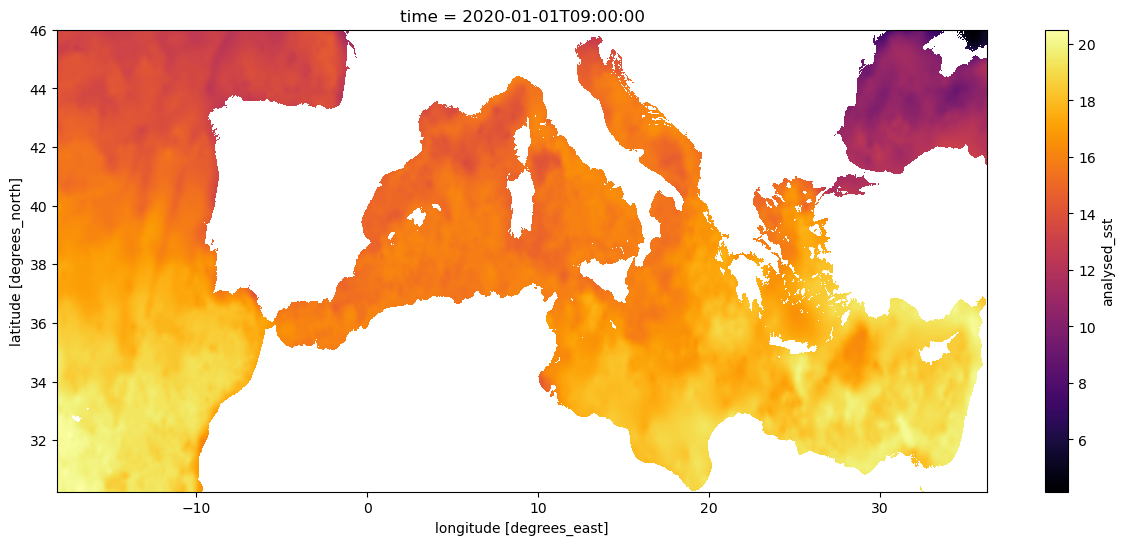

In [3]:
(sst_med["analysed_sst"]-273.15).where(sst_med["mask"] == 1).plot(figsize=(15, 6), cmap="inferno")

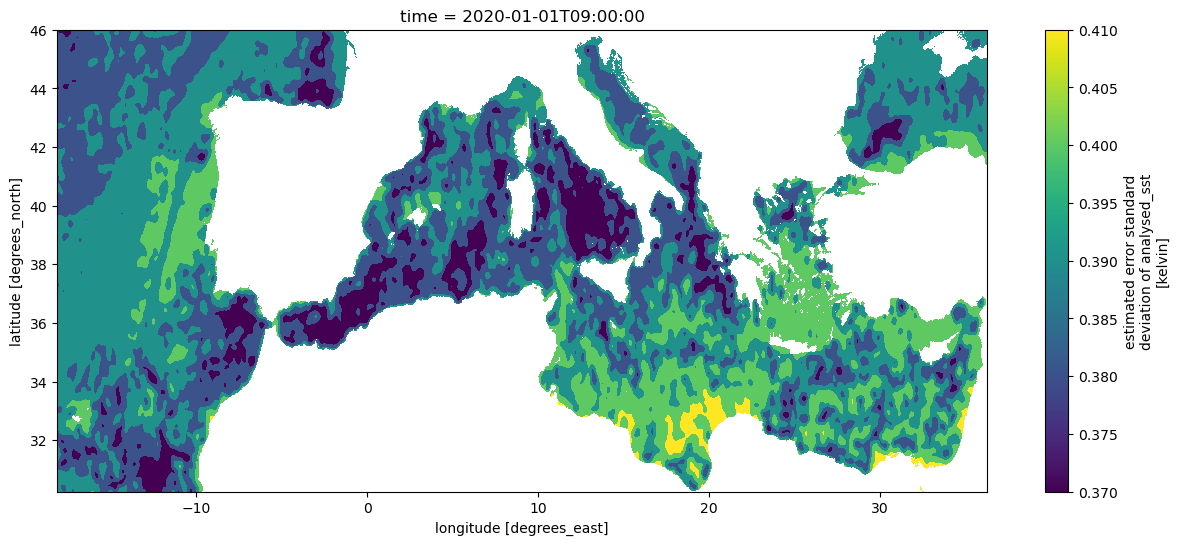

In [4]:
(sst_med["analysis_error"]).where(sst_med["mask"] == 1).plot(figsize=(15, 6))

In [5]:
import clouddrift as cd
ds = cd.datasets.gdp1h()
ds

<xarray.Dataset> Size: 16GB
Dimensions:                (traj: 19396, obs: 197214787)
Coordinates:
    id                     (traj) int64 155kB ...
    time                   (obs) datetime64[ns] 2GB ...
Dimensions without coordinates: traj, obs
Data variables: (12/59)
    BuoyTypeManufacturer   (traj) |S20 388kB ...
    BuoyTypeSensorArray    (traj) |S20 388kB ...
    CurrentProgram         (traj) float32 78kB ...
    DeployingCountry       (traj) |S20 388kB ...
    DeployingShip          (traj) |S20 388kB ...
    DeploymentComments     (traj) |S20 388kB ...
    ...                     ...
    start_lat              (traj) float32 78kB ...
    start_lon              (traj) float32 78kB ...
    typebuoy               (traj) |S10 194kB ...
    typedeath              (traj) int8 19kB ...
    ve                     (obs) float32 789MB ...
    vn                     (obs) float32 789MB ...
Attributes: (12/16)
    Conventions:       CF-1.6
    acknowledgement:   Elipot, Shane; Sykulski, Adam; Lumpkin, Rick; Centurio...
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    date_created:      2023-09-08T17:05:12.130123
    doi:               10.25921/x46c-3620
    ...                ...
    processing_level:  Level 2 QC by GDP drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    publisher_name:    GDP Drifter DAC
    publisher_url:     https://www.aoml.noaa.gov/phod/gdp
    summary:           Global Drifter Program hourly data
    title:             Global Drifter Program hourly drifting buoy collection

In [8]:
#criteria = {"lon": (x1, x2), "lat": (y1, y2), "time": (np.datetime64("2020-01-01T00:00:00"), np.datetime64("2020-01-01T23:59:59"))}
criteria = {"lon": (x1, x2), "lat": (y1, y2), "time": np.datetime64("2020-01-01T09:00:00")}
ds_med = cd.ragged.subset(ds,criteria, row_dim_name="traj", rowsize_var_name="rowsize", obs_dim_name="obs")
ds_med

<xarray.Dataset> Size: 10kB
Dimensions:                (traj: 23, obs: 23)
Coordinates:
    id                     (traj) int64 184B 300234063942850 ... 300234068054200
    time                   (obs) datetime64[ns] 184B 2020-01-01T09:00:00 ... ...
Dimensions without coordinates: traj, obs
Data variables: (12/59)
    BuoyTypeManufacturer   (traj) |S20 460B ...
    BuoyTypeSensorArray    (traj) |S20 460B ...
    CurrentProgram         (traj) float32 92B ...
    DeployingCountry       (traj) |S20 460B ...
    DeployingShip          (traj) |S20 460B ...
    DeploymentComments     (traj) |S20 460B ...
    ...                     ...
    start_lat              (traj) float32 92B ...
    start_lon              (traj) float32 92B ...
    typebuoy               (traj) |S10 230B ...
    typedeath              (traj) int8 23B ...
    ve                     (obs) float32 92B ...
    vn                     (obs) float32 92B ...
Attributes: (12/16)
    Conventions:       CF-1.6
    acknowledgement:   Elipot, Shane; Sykulski, Adam; Lumpkin, Rick; Centurio...
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    date_created:      2023-09-08T17:05:12.130123
    doi:               10.25921/x46c-3620
    ...                ...
    processing_level:  Level 2 QC by GDP drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    publisher_name:    GDP Drifter DAC
    publisher_url:     https://www.aoml.noaa.gov/phod/gdp
    summary:           Global Drifter Program hourly data
    title:             Global Drifter Program hourly drifting buoy collection

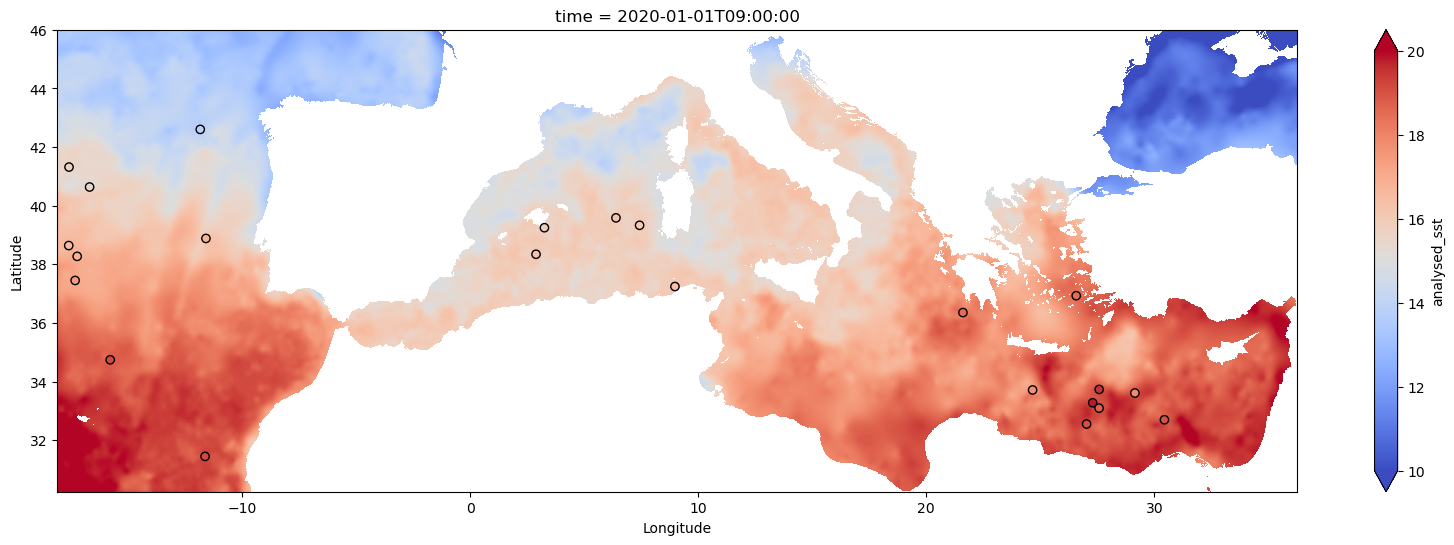

In [71]:
import matplotlib.pyplot as plt

#plt.figure()
(sst_med["analysed_sst"]-273.15).where(sst_med["mask"] == 1).plot(figsize=(20, 6), cmap="coolwarm",vmin=10,vmax=20)
plt.scatter(ds_med["lon"], ds_med["lat"], c=ds_med["sst1"]-273.15, cmap="coolwarm",edgecolors="black",vmin=10,vmax=20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.title("Scatter Plot of Lon, Lat, and SST1-273.15")
#plt.colorbar(label="SST1-273.15")
plt.show()

In [20]:
# this creates an interpolated dataset on a grid of lat and lon from the drifters but that is not what we want
#ds_med_mur = sst_med['analysed_sst'].interp(lon=ds_med['lon'][0].to_numpy(), lat=ds_med['lat'][0].to_numpy(), method='nearest')

In [30]:
from scipy.interpolate import interpn

In [55]:
mur = interpn((sst_med.lat, sst_med.lon), sst_med["analysed_sst"][0,:,:].values, (ds_med["lat"], ds_med["lon"]), method='nearest', bounds_error=True)
#dum2 = interpn((sst_med.lat, sst_med.lon), sst_med["analysed_sst"][0,:,:].values, (ds_med["lat"], ds_med["lon"]), method='linear', bounds_error=True)
mur_error = interpn((sst_med.lat, sst_med.lon), sst_med["analysis_error"][0,:,:].values, (ds_med["lat"], ds_med["lon"]), method='nearest', bounds_error=True)

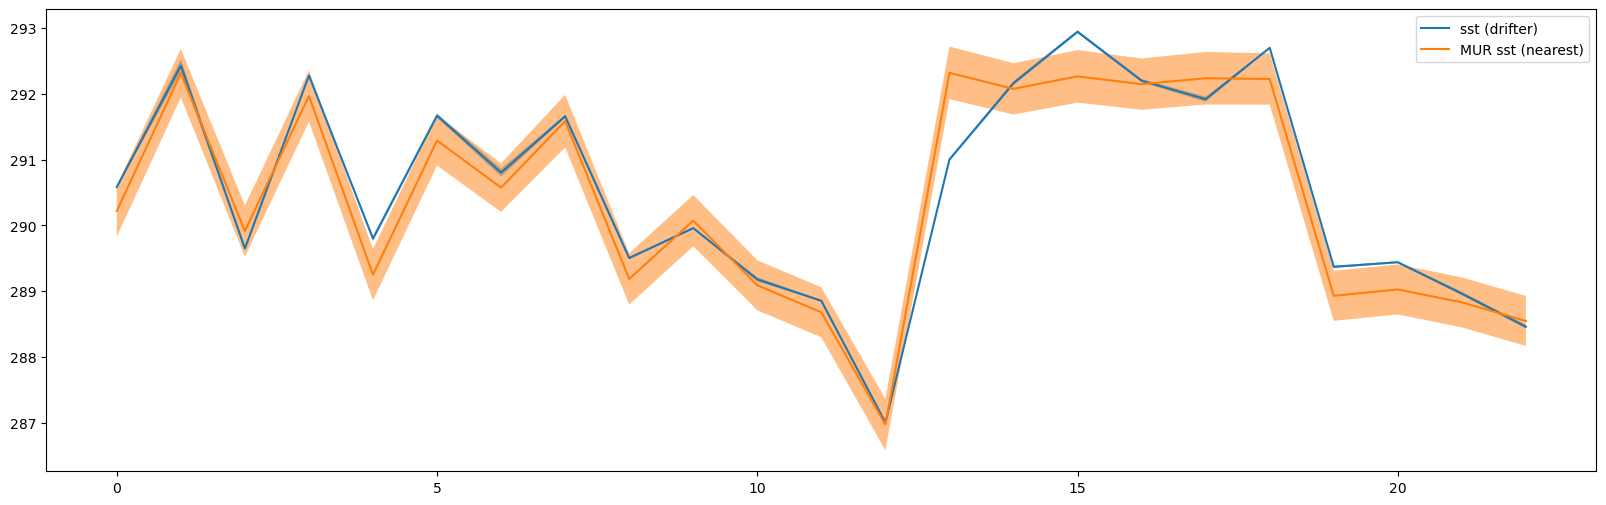

In [63]:
# this is not a time series but that is only for visualization
plt.figure(figsize=(20, 6))
plt.plot(ds_med["sst"],label='sst (drifter)')
#plt.plot(ds_med["sst"]+2*ds_med["err_sst"],label='sst+ 2 sigma (drifter)')
#plt.plot(ds_med["sst"]-2*ds_med["err_sst"],label='sst- 2 sigma (drifter)')
plt.fill_between(np.arange(len(ds_med["sst"])),ds_med["sst"]-2*ds_med["err_sst"],ds_med["sst"]+2*ds_med["err_sst"],alpha=0.5)
#plt.plot(ds_med["sst1"],label='sst1 (drifter)')
plt.plot(mur,label='MUR sst (nearest)')
plt.fill_between(np.arange(len(mur)),mur-1*mur_error,mur+1*mur_error,alpha=0.5)
#plt.plot(dum2,linestyle='--',label='MUR sst (linear)')
plt.legend()


In [53]:
ds_med["err_sst"].values

array([0.00882678, 0.04815325, 0.00436543, 0.00393957, 0.01816609,
       0.01661238, 0.03087027, 0.01084136, 0.0091753 , 0.00470265,
       0.01634019, 0.00547306, 0.00840502, 0.01218192, 0.01619665,
       0.01128099, 0.0123012 , 0.02002716, 0.00454006, 0.00865974,
       0.00752763, 0.01348224, 0.01418141], dtype=float32)

In [73]:
# to do next: get the data from 2019-01 from the drifters
criteria_2019 = {"lon": (x1, x2), "lat": (y1, y2), "time": (np.datetime64("2019-01-01T00:00:00"),np.datetime64("2019-01-31T23:00:00"))}
ds_med_2019 = cd.ragged.subset(ds,criteria_2019, row_dim_name="traj", rowsize_var_name="rowsize", obs_dim_name="obs")
ds_med_2019

<xarray.Dataset> Size: 852kB
Dimensions:                (traj: 16, obs: 10579)
Coordinates:
    id                     (traj) int64 128B 300234063350030 ... 300234065617120
    time                   (obs) datetime64[ns] 85kB 2019-01-01 ... 2019-01-3...
Dimensions without coordinates: traj, obs
Data variables: (12/59)
    BuoyTypeManufacturer   (traj) |S20 320B ...
    BuoyTypeSensorArray    (traj) |S20 320B ...
    CurrentProgram         (traj) float32 64B ...
    DeployingCountry       (traj) |S20 320B ...
    DeployingShip          (traj) |S20 320B ...
    DeploymentComments     (traj) |S20 320B ...
    ...                     ...
    start_lat              (traj) float32 64B ...
    start_lon              (traj) float32 64B ...
    typebuoy               (traj) |S10 160B ...
    typedeath              (traj) int8 16B ...
    ve                     (obs) float32 42kB ...
    vn                     (obs) float32 42kB ...
Attributes: (12/16)
    Conventions:       CF-1.6
    acknowledgement:   Elipot, Shane; Sykulski, Adam; Lumpkin, Rick; Centurio...
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    date_created:      2023-09-08T17:05:12.130123
    doi:               10.25921/x46c-3620
    ...                ...
    processing_level:  Level 2 QC by GDP drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    publisher_name:    GDP Drifter DAC
    publisher_url:     https://www.aoml.noaa.gov/phod/gdp
    summary:           Global Drifter Program hourly data
    title:             Global Drifter Program hourly drifting buoy collection

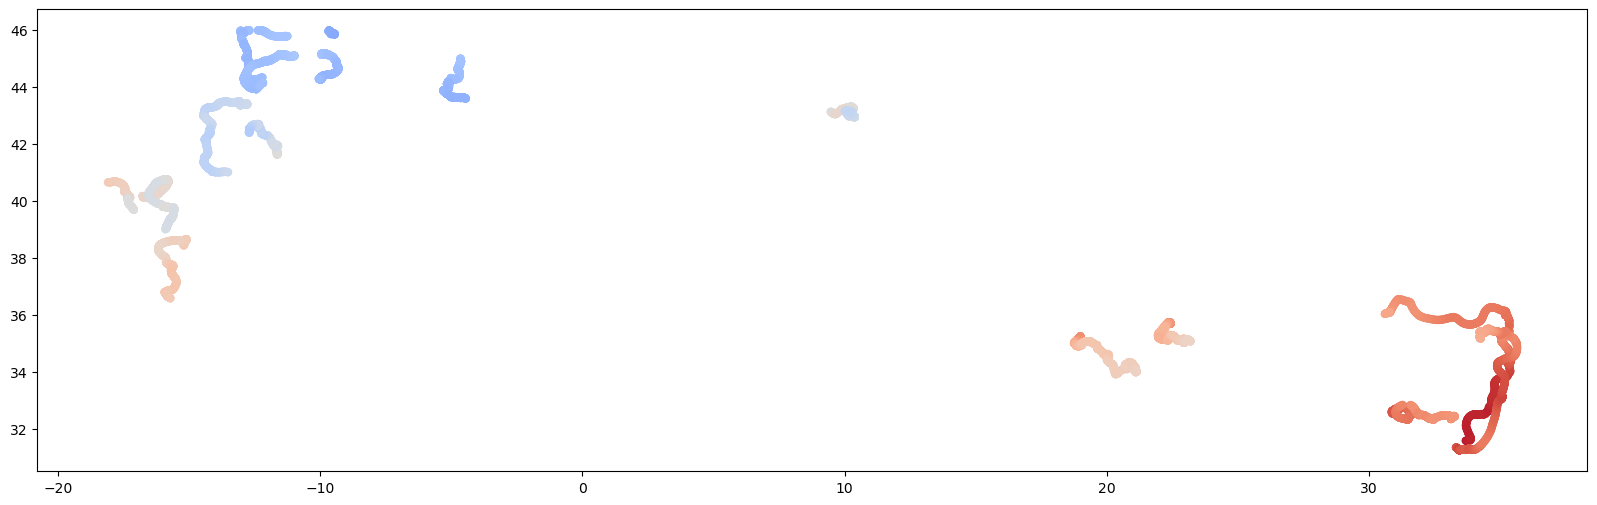

In [76]:
plt.figure(figsize=(20, 6))
plt.scatter(ds_med_2019["lon"], ds_med_2019["lat"], c=ds_med_2019["sst1"]-273.15, cmap="coolwarm",edgecolors="none",vmin=10,vmax=20)


In [85]:
mur_2019 = interpn((sst_med_201901.time,sst_med_201901.lat, sst_med_201901.lon), sst_med_201901["analysed_sst"].values, (ds_med_2019["time"],ds_med_2019["lat"], ds_med_2019["lon"]),
                    method='linear', bounds_error=False, fill_value=None)


In [90]:
mur_error_2019 = interpn((sst_med_201901.time,sst_med_201901.lat, sst_med_201901.lon), sst_med_201901["analysis_error"].values, (ds_med_2019["time"],ds_med_2019["lat"], ds_med_2019["lon"]),
                    method='linear', bounds_error=False, fill_value=None)


In [102]:
ds_med_2019 = ds_med_2019.assign(mur=('obs', mur_2019), mur_error=('obs', mur_error_2019))
ds_med_2019

<xarray.Dataset> Size: 1MB
Dimensions:                (traj: 16, obs: 10579)
Coordinates:
    id                     (traj) int64 128B 300234063350030 ... 300234065617120
    time                   (obs) datetime64[ns] 85kB 2019-01-01 ... 2019-01-3...
Dimensions without coordinates: traj, obs
Data variables: (12/61)
    BuoyTypeManufacturer   (traj) |S20 320B ...
    BuoyTypeSensorArray    (traj) |S20 320B ...
    CurrentProgram         (traj) float32 64B ...
    DeployingCountry       (traj) |S20 320B ...
    DeployingShip          (traj) |S20 320B ...
    DeploymentComments     (traj) |S20 320B ...
    ...                     ...
    typebuoy               (traj) |S10 160B ...
    typedeath              (traj) int8 16B ...
    ve                     (obs) float32 42kB ...
    vn                     (obs) float32 42kB ...
    mur                    (obs) float64 85kB 288.8 288.8 288.8 ... 289.9 289.9
    mur_error              (obs) float64 85kB 0.37 0.37 0.37 ... 0.38 0.38 0.38
Attributes: (12/16)
    Conventions:       CF-1.6
    acknowledgement:   Elipot, Shane; Sykulski, Adam; Lumpkin, Rick; Centurio...
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    date_created:      2023-09-08T17:05:12.130123
    doi:               10.25921/x46c-3620
    ...                ...
    processing_level:  Level 2 QC by GDP drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    publisher_name:    GDP Drifter DAC
    publisher_url:     https://www.aoml.noaa.gov/phod/gdp
    summary:           Global Drifter Program hourly data
    title:             Global Drifter Program hourly drifting buoy collection

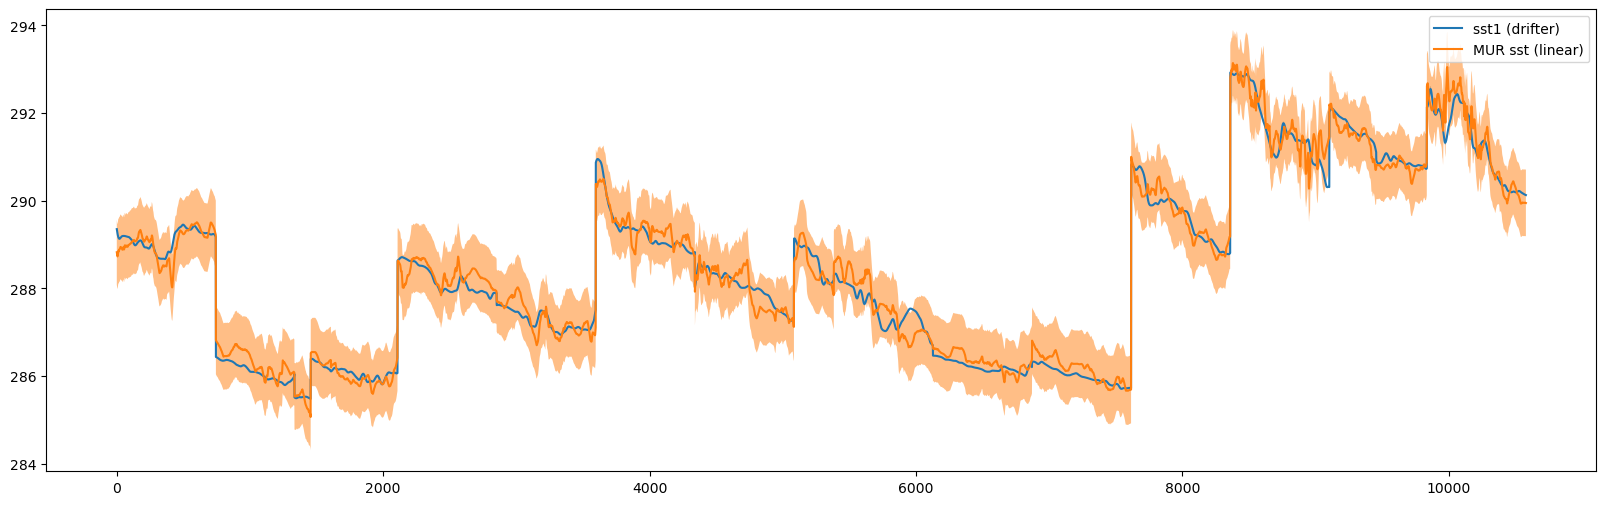

In [103]:
# plot collated time series of drifter and MUR SST
plt.figure(figsize=(20, 6))
plt.plot(ds_med_2019["sst1"],label='sst1 (drifter)')
plt.fill_between(np.arange(len(ds_med_2019["sst1"])),ds_med_2019["sst1"]-2*ds_med_2019["err_sst1"],ds_med_2019["sst1"]+2*ds_med_2019["err_sst1"],alpha=0.5)
# plt.plot(ds_med_2019["sst"],label='sst (drifter)')
# plt.fill_between(np.arange(len(ds_med_2019["sst"])),ds_med_2019["sst"]-2*ds_med_2019["err_sst"],ds_med_2019["sst"]+2*ds_med_2019["err_sst"],alpha=0.5)
plt.plot(ds_med_2019["mur"],label='MUR sst (linear)')
plt.fill_between(np.arange(len(ds_med_2019["mur"])),ds_med_2019["mur"]-2*ds_med_2019["mur_error"],ds_med_2019["mur"]+2*ds_med_2019["mur_error"],alpha=0.5)
plt.legend()


In [134]:
# the representation above could be improved

# unpack the trajectory data into lists for easier plotting
from clouddrift.ragged import unpack

t = unpack(ds_med_2019["time"],rowsize=ds_med_2019["rowsize"])
sst_drifter = unpack(ds_med_2019["sst"],rowsize=ds_med_2019["rowsize"])
sst1_drifter = unpack(ds_med_2019["sst1"],rowsize=ds_med_2019["rowsize"])
err_sst_drifter = unpack(ds_med_2019["err_sst"],rowsize=ds_med_2019["rowsize"])
sst_mur = unpack(ds_med_2019["mur"],rowsize=ds_med_2019["rowsize"])
err_sst_mur = unpack(ds_med_2019["mur_error"],rowsize=ds_med_2019["rowsize"])


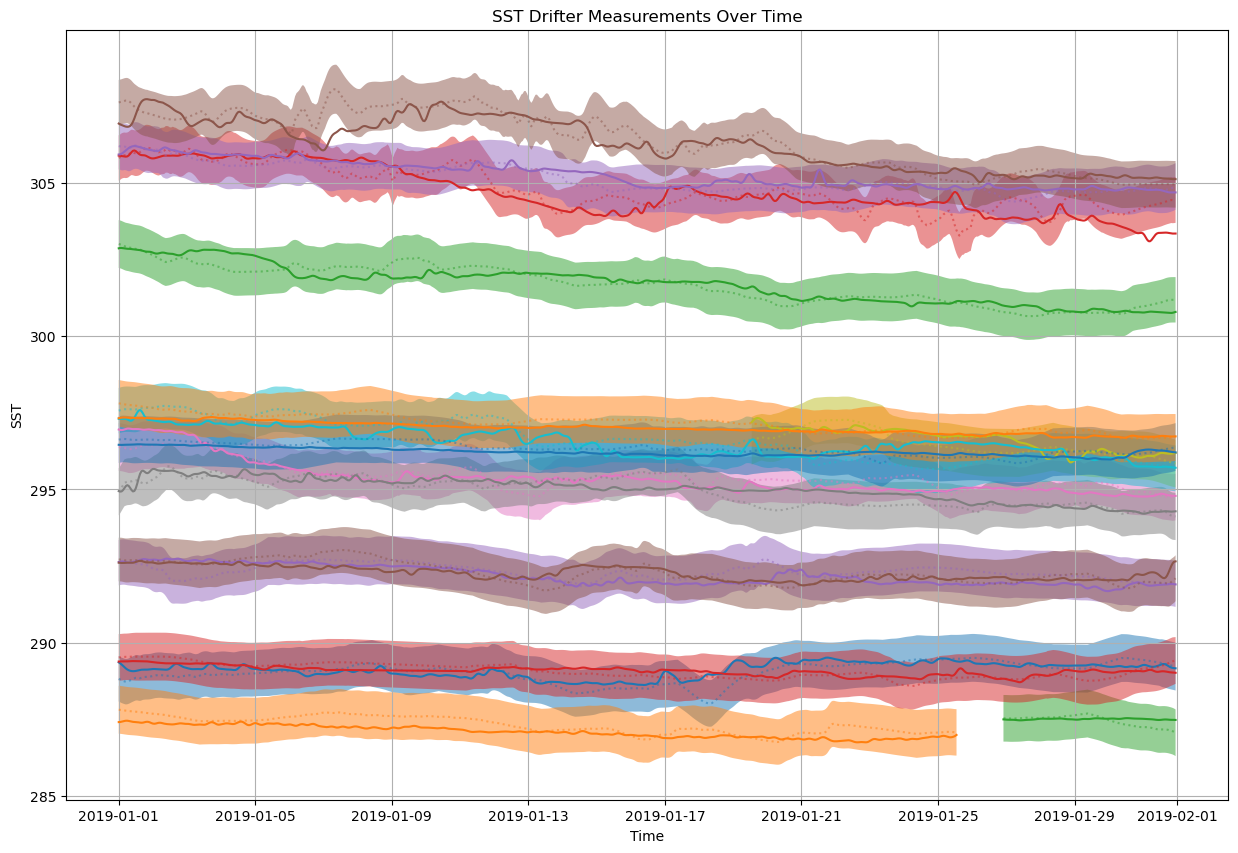

In [153]:
# plot the data
plt.figure(figsize=(15, 10))  # Optional: Adjust figure size

offset = 0
for time, sst1, sst2, err_sst2 in zip(t, sst_drifter, sst_mur, err_sst_mur):
    hc = plt.plot(time, sst1 + offset)  # Example: No line, only markers
    plt.plot(time, sst2 + offset, color=hc[0].get_color(),alpha=0.5,linestyle=':')  # Example: No line, only markers
    plt.fill_between(time, sst2+ offset-2*err_sst2, sst2+ offset+2*err_sst2, alpha=0.5)

    offset = offset + 1

plt.title('SST Drifter Measurements Over Time')
plt.xlabel('Time')
plt.ylabel('SST')
plt.grid(True)  # Optional: Show grid
plt.show()